# Introduction:
This is a demonstration of __ChoroPie__, a Basemap/Matplotlib toolkit I created which allows the simplified creation of choropleth maps with colorbars using shapefiles, and the combined plotting of pie charts within the centroid coordinates of the shapefile's polygons.

The library can be installed with pip using _pip install choropie_

#### The final output:
<img src="https://user-images.githubusercontent.com/30331170/33050018-b200156e-ce30-11e7-9ffa-b58885df2062.png" width="50%"/>

##### Url to Github repo:
https://github.com/vinceniko/choropie

###### *Disclaimer: The colors used to present the racially focused data is not reflective of any kind of idealogy. I realize that some may find the use of these colors to be offensive, but no offense was implied or intended. The chosen colors are merely used to better explain the concepts being introduced below.

# imports

In [1]:
import numpy as np
import pandas as pd
import os
import datetime as dt

from choropie import ChoroPie as cp

# state names and abbreviations

In [2]:
dict_states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AS': 'American Samoa',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'GU': 'Guam',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MP': 'Northern Mariana Islands',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NA': 'National',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VI': 'Virgin Islands',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

# import general state population dataset and remove first three rows

In [3]:
df_pop = pd.read_csv('Data/state_population_estimates.csv')  # taken from census data
df_pop['area'] = df_pop['area'].apply(lambda name: name.replace(' ','').replace('.',''))
df_pop.head()

,area,census,estimates_base,2010,2011,2012,2013,2014,2015,2016
0,Alabama,4779736,4780131,4785492,4799918,4815960,4829479,4843214,4853875,4863300
1,Alaska,710231,710249,714031,722713,731089,736879,736705,737709,741894
2,Arizona,6392017,6392301,6408312,6467163,6549634,6624617,6719993,6817565,6931071
3,Arkansas,2915918,2916025,2921995,2939493,2950685,2958663,2966912,2977853,2988248
4,California,37253956,37254522,37332685,37676861,38011074,38335203,38680810,38993940,39250017


# select necessary state rows and correct year

In [4]:
series_pop = df_pop[['area','2016']]
series_pop.head()

,area,2016
0,Alabama,4863300
1,Alaska,741894
2,Arizona,6931071
3,Arkansas,2988248
4,California,39250017


# import police killings dataset

In [5]:
df_killings = pd.read_csv('Data/PoliceKillingsUS.csv', encoding="latin1") # set proper encoding or get error. i combined the sheets into one file here
df_killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# replace race abbreviations

In [6]:
def abr(x):
    try:
        if x[0] == 'A':
            return "Asian"
        if x[0] == 'B':
            return "Black"
        if x[0] == 'H':
            return "Hispanic"
        if x[0] == 'N':
            return "Native American"
        if x[0] == 'O':
            return "Ocean Pacific"
        if x[0] == 'W':
            return "White"
    except Exception:
        return None


df_killings['race'] = df_killings['race'].apply(abr)
df_killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False


# use datetime module to extract min and max dates of dataset

In [7]:
# format dates to Jan. 01, 06 format
# used for title of plot
max_date = df_killings['date'].apply(
    lambda x: dt.datetime.strptime(x, '%d/%m/%y')).max().strftime('%b. %d, %y')
min_date = df_killings['date'].apply(
    lambda x: dt.datetime.strptime(x, '%d/%m/%y')).min().strftime('%b. %d, %y')

# series breaking down count of killings by state

In [8]:
series_state = df_killings.groupby('state').count()['id'].reset_index()
series_state = series_state.rename(columns={'id':'count'}).assign(state = lambda x: x['state'].apply(lambda abbr: dict_states[abbr]))
series_state.head()

,state,count
0,Alaska,15
1,Alabama,50
2,Arkansas,26
3,Arizona,118
4,California,424


# series breaking down count of killings by state and race (MultiIndex)

In [9]:
series_race = df_killings.groupby(['state', 'race']).agg({'id':'count'}).rename(columns={'id':'count'}).reset_index()
series_race.head()

,state,race,count
0,AK,Black,1
1,AK,Native American,6
2,AK,White,7
3,AL,Black,14
4,AL,White,32


# percentage of each race killed by state

In [10]:
series_race_agg = series_race.groupby('state').agg({'count':'sum'}).reset_index()
series_race_agg = series_race_agg.assign(
    state = lambda x: x['state'].apply(lambda abbr: dict_states[abbr]),
    pct = lambda x: round((x['count'] / x['count'].sum()) * 100, 2)
)
series_race_agg.head()

,state,count,pct
0,Alaska,14,0.60
1,Alabama,46,1.97
2,Arkansas,22,0.94
3,Arizona,107,4.57
4,California,383,16.37


# df_state is the first df we will use for plotting

In [11]:
exclude = ['Hawaii','Alaska']
df_state = series_pop.merge(series_race_agg, left_on='area', right_on='state').assign(
    per_capita = lambda x: x['count'] / x['2016'] * 100
).drop('area', axis=1)
# df_state = df_state.query('state not in @exclude')
df_state.head()

,2016,state,count,pct,per_capita
0,4863300,Alabama,46,1.97,0.000946
1,741894,Alaska,14,0.60,0.001887
2,6931071,Arizona,107,4.57,0.001544
3,2988248,Arkansas,22,0.94,0.000736
4,39250017,California,383,16.37,0.000976


# intermediary step

In [12]:
# population by race for each state
df_state_race = pd.read_excel('Data/state_race.xlsx', index_col=0)

df_state_race = df_state_race.iloc[1:, :]
df_state_race.columns.name = 'race'

# transform columns into multiindex
df_massaged = pd.melt(
    df_state_race.reset_index(), 
    id_vars='Geography', 
    value_vars=df_state_race.columns
).groupby(['Geography', 'race']).agg(lambda x: x.iloc[0]).reset_index().rename(columns={'Geography':'state'})
# df_massaged = df_massaged.query('state not in @exclude')
df_massaged.head()

,state,race,value
0,Alabama,Asian,1590
1,Alabama,Black,15233
2,Alabama,Hispanic,203845
3,Alabama,Mixed,6966
4,Alabama,Native American,6755


In [13]:
df_state = df_state.set_index('state')
df_state.head()

,2016,count,pct,per_capita
state,,,,
Alabama,4863300,46,1.97,0.000946
Alaska,741894,14,0.60,0.001887
Arizona,6931071,107,4.57,0.001544
Arkansas,2988248,22,0.94,0.000736
California,39250017,383,16.37,0.000976


# df_race is the second df we will use for plotting

In [14]:
df_race = df_state.merge(df_massaged, on='state').dropna().set_index(['state','race'])
df_race.head()

2016  count   pct  per_capita   value
state   race                                                     
Alabama Asian            4863300     46  1.97    0.000946    1590
        Black            4863300     46  1.97    0.000946   15233
        Hispanic         4863300     46  1.97    0.000946  203845
        Mixed            4863300     46  1.97    0.000946    6966
        Native American  4863300     46  1.97    0.000946    6755

# shp file processing

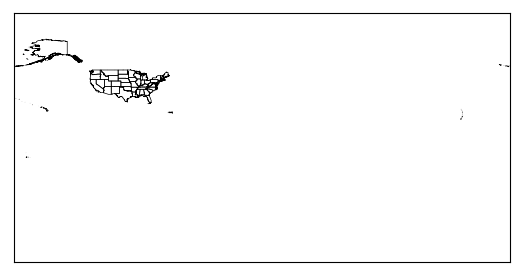

In [15]:
shp_file = 'Data/cb_2016_us_state_500k/cb_2016_us_state_500k'

shp_lst = cp.get_shp_attributes(shp_file)
shp_key = cp.find_shp_key(df_state.index, shp_lst)  # which shp attribute holds our index values
###

basemap = dict(
    basemap_kwargs=dict(
        llcrnrlon=-119, 
        llcrnrlat=22, 
        urcrnrlon=-64, 
        urcrnrlat=49, 
        projection='lcc', 
        lat_1=33, 
        lat_2=45, 
        lon_0=-95
    ),
    shp_file=shp_file,
    shp_key=shp_key,
    figsize=(22, 12),
)

choro = dict(
    num_colors=8,
    cmap='hot_r',
    color_data=df_state['count'],
)

pie = dict(
    size_data=df_state['per_capita'],
    # size_ratios=df_race['per_capita'],
    size_ratios=None,
    pie_data=df_race['pct'],
    pie_dict={
        'Asian': 'cyan', 
        'Black': 'blue', 
        'Hispanic': 'green',
        'Mixed': 'brown',
        'Native American': 'purple', 
        'Ocean Pacific': 'red', 
        'White': '0.75'
    },
    scale_factor_size=1,
    scale_factor_ratios=1 / 2
)

# Arguments Explained:
Where color_data and size data are Pandas single-index series with the area_names used in the shp file as the index.  
Ie.  

area_name | per capita rate
--- | ---
alabama | .000010
alaska | .000020
arizona | .000017

Where pie_data and size_ratios are Pandas multi-index series with the area_names used in the shp file as the first index, and the pie chart slices (the ones passed into the pie_dict parameter), as the second index. 
Ie.

area_name | race | per-race rate
--- | --- | ---
alabama | black | 0.000919
alabama | white | 0.000188
alaska | black | 0.000338
alaska | native american | 0.001135
alaska | white | 0.000105

##### Notes-   
* The ChoroPie class inherits directly from Basemap.
* Pie plotting is optional. If pies are plotted, both size_data and size_ratios are optional. Not all pies have to be plotted as well (if it gets too cluttered...though in that case you can call the zoom_to_area method).  
* Choropleth plotting is optional.  
* The pie_dict parameter selects the colors for each pie slice.  


# create ChoroPie object

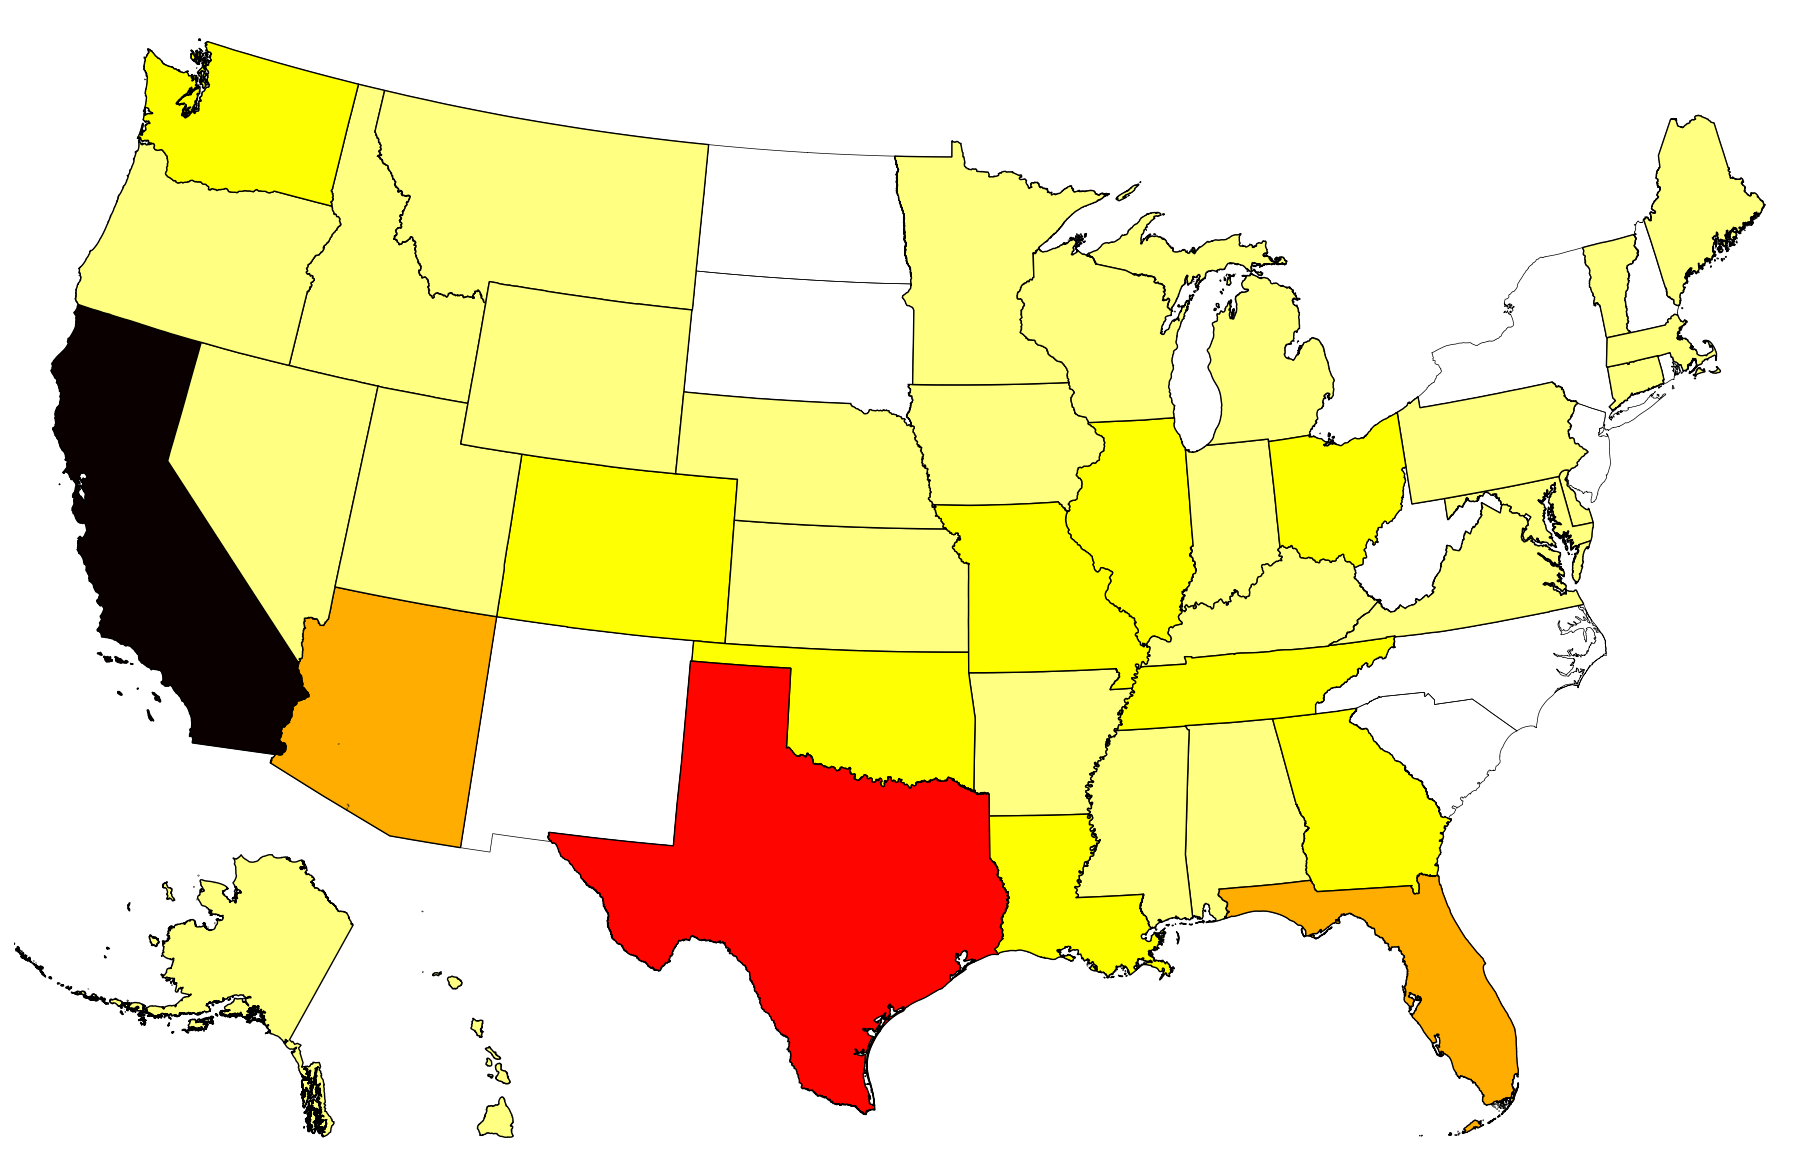

In [16]:
m = cp.ChoroPie(**basemap)
m.choro_plot(**choro)
m

# plot pies

In [17]:
m.pie_plot(**pie)

# insert colorbar

In [18]:
m.insert_colorbar(colorbar_title='Map: Count of Killings', colorbar_loc_kwargs=dict(location='right'))

# insert legend for pie charts

In [19]:
m.insert_pie_legend(legend_loc='lower right', pie_legend_kwargs=dict(title='Pies: Racial Breakdown'))

# set title

In [20]:
m.ax.set_title('Police Killings: {} - {}\nTotal: {:,d}'.format(min_date, max_date,
    df_killings.iloc[:, 0].count()), fontsize=35, fontweight='bold', x=0.61, y=0.90)

Text(0.61,0.9,'Police Killings: Jan. 02, 15 - Jul. 31, 17\nTotal: 2,535')

# ticks of the colorbar

In [21]:
m.ax_colorbar.set_yticklabels(['{:.0f}'.format(
    float(i.get_text())) for i in m.ax_colorbar.get_ymajorticklabels()])

[Text(1,0,'3'),
 Text(1,0,'50'),
 Text(1,0,'98'),
 Text(1,0,'146'),
 Text(1,0,'193'),
 Text(1,0,'240'),
 Text(1,0,'288'),
 Text(1,0,'336'),
 Text(1,0,'383')]

# display the map 

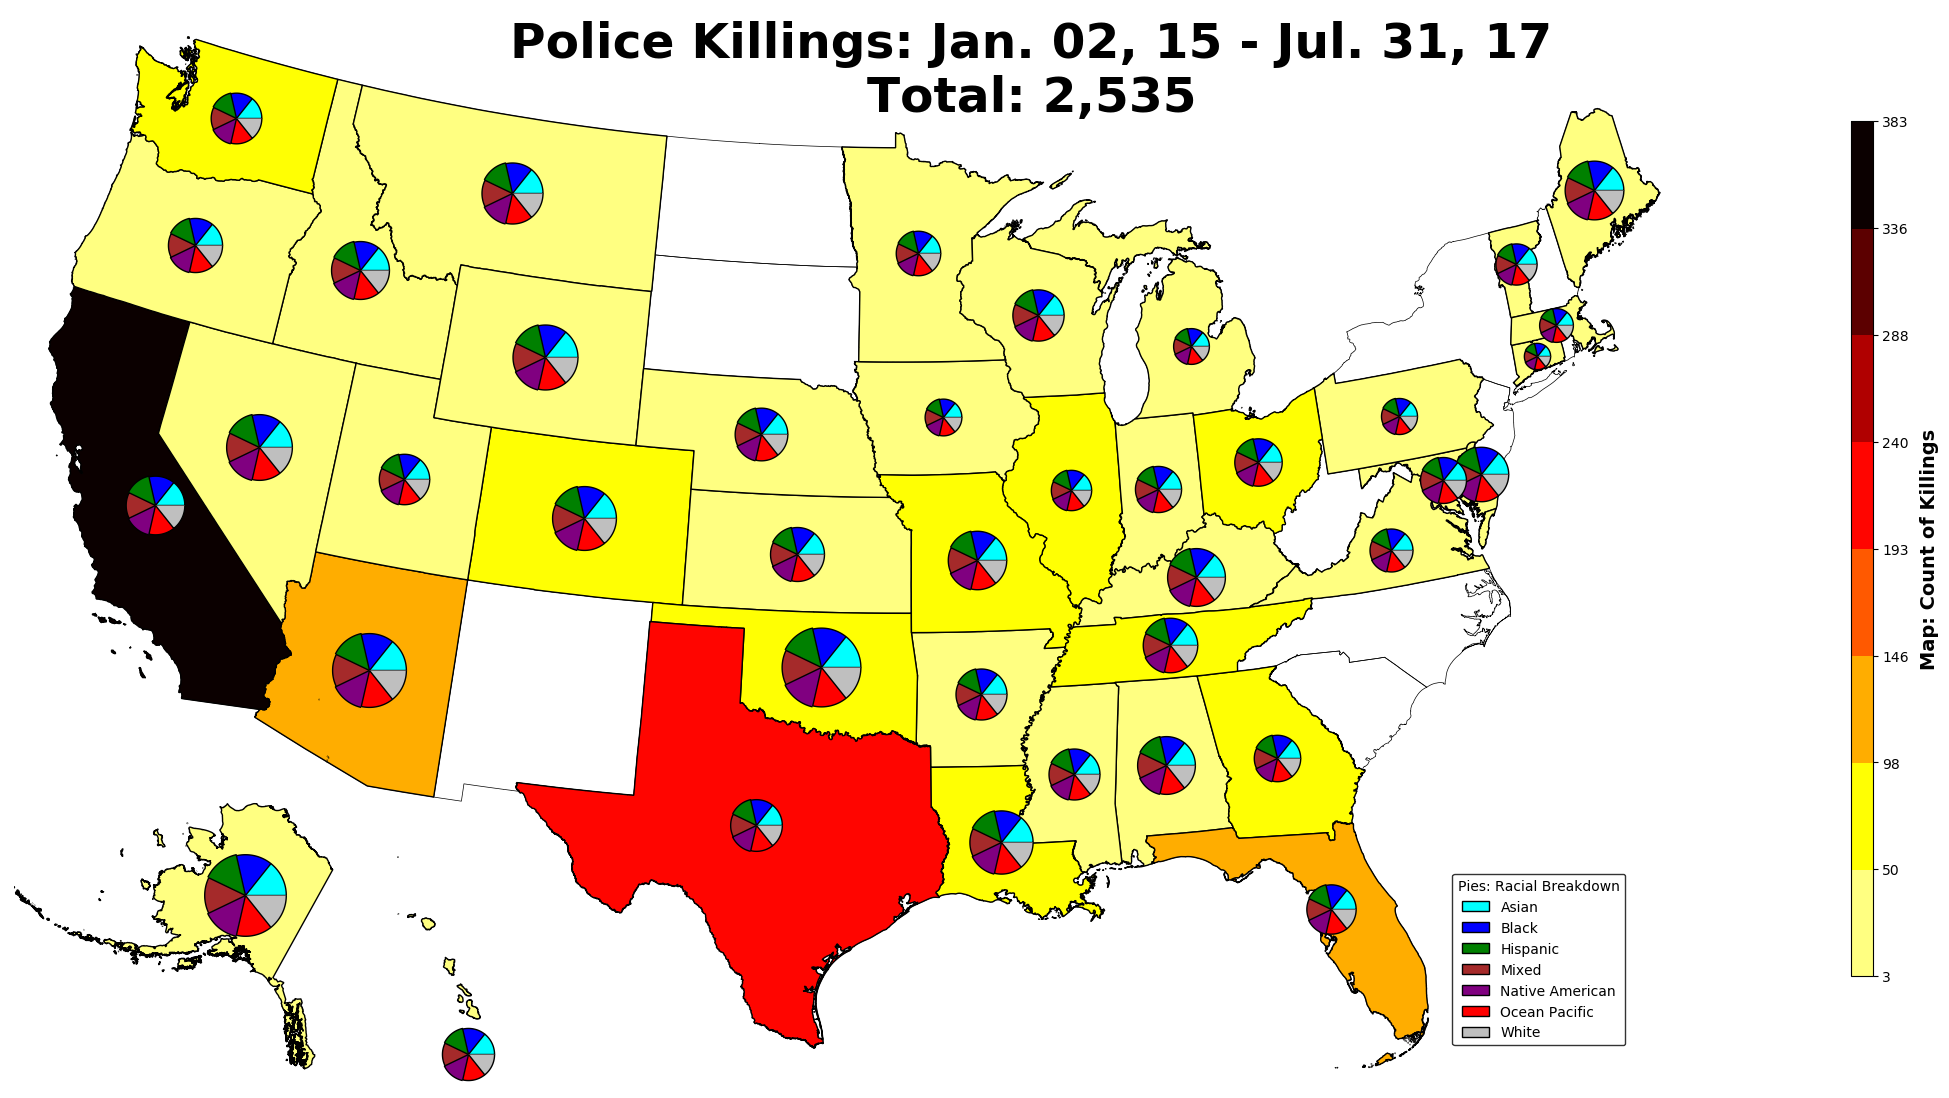

In [22]:
m.fig

# Conclussions:

### Results:
By examining the results we can see that:
1. California has had the most police killings.  
2. California has not had the highest per capita rate of police killings, with states such as New Mexico edging out ahead.  
3. In most states, the race with the most deaths were whites.  
4. Despite that, in states such as Oklahoma and Missiori, more blacks were killed proportionally when adjusted for the population differences of each race.  

# Other examples:

Without size_data:  
<img src="https://user-images.githubusercontent.com/30331170/33050049-ebfc0cd2-ce30-11e7-92df-84269f423ea8.png" width="60%" />

With size_data:  
<img src="https://user-images.githubusercontent.com/30331170/33052907-04c44316-ce3f-11e7-9bb0-d3c426502de4.png" width="60%" />
